# TensorFlow로 ANN 시작하기

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

tf.random.set_seed(1234) #random seed 설정


In [ ]:
# 연습용 데이터
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

In [ ]:
# 인공신경망 모형 구성(퍼셉트론)
model = Sequential()
model.add(Dense(3, input_shape = (2, ), activation = 'linear')) #
model.add(Dense(1, activation = 'linear')) #
#모형 컴파일
model.compile(optimizer = 'SGD', loss = mse, metrics = ['acc']) #평가지표 설정
#모형 학습 및 가중치 확인
model.fit(x,y,epochs = 10)
model.get_weights()

Epoch 1/10
1/1 [==============================] - 1s 975ms/step - loss: 4.6041 - acc: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 3.9017 - acc: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 3.3546 - acc: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 32ms/step - loss: 2.9189 - acc: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 2.5656 - acc: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 2.2747 - acc: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 2.0320 - acc: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 1.8271 - acc: 0.2500
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 1.6525 - acc: 0.2500
Epoch 10/10
1/1 [==============================] - 0s 14ms/step - loss: 1.5025 - acc: 0.2500


[array([[ 0.797361  ,  1.0541171 ,  0.21874581],
        [ 0.7909753 , -0.34230295, -0.56851417]], dtype=float32),
 array([-0.23658395, -0.02176277, -0.04569821], dtype=float32),
 array([[-0.74911773],
        [-0.00320284],
        [-0.21241358]], dtype=float32),
 array([0.25852764], dtype=float32)]

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(3,1) )
model.fit( x,y)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 1))

- 위에 있는 예제를 변형하셔서
- 은닉층 2개인 ANN을 만드세요.
- 은닉층1: 노드3,
- 은닉층2: 노드1

- Activation Function: Sigmoid VS ReLU VS TanH VS Step

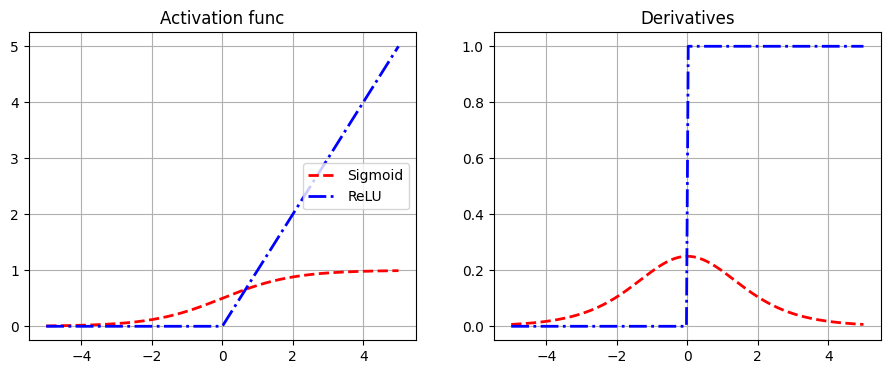

In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

#함수 미분
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(z, sigmoid(z), "r--", linewidth=2, label="Sigmoid")
plt.plot(z, relu(z), "b-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=10)
plt.title("Activation func")

plt.subplot(122)
#plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
#plt.plot(0, 0, "ro", markersize=5)
#plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "r--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(relu, z), "b-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives")
plt.show()


# 학습율

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 587ms/step - loss: 0.2596 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.2585 - acc: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.2575 - acc: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.2566 - acc: 0.2500
Epoch 5/50
1/1 [===========================

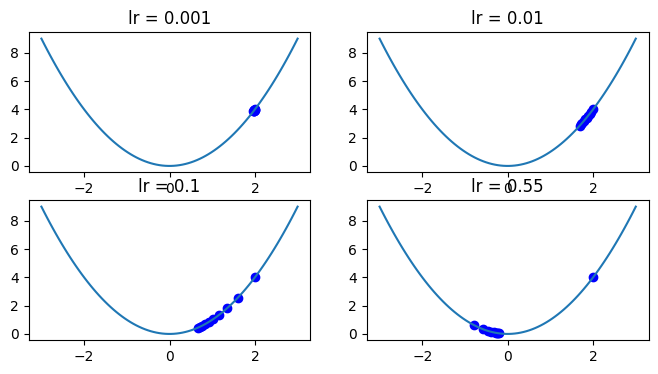

In [ ]:
tf.random.set_seed(1234)

# XOR gate를 나타낸 X, Y
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

#모형 구성
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation = 'relu')) #node의 수 32
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모형 컴파일
model.compile(optimizer = 'adam', loss = mse, metrics = ['acc'])

#학습
model.fit(x,y,epochs = 50)

#학습율과 경사하강
lr_list = [0.001, 0.01, 0.1, 0.55]

def get_derivative(lr_list):
  weight_prev = 2
  derivative = [weight_prev]
  y = [weight_prev ** 2] # 손실 함수 y = x^2
  for i in range(1,10):
    dev_value = weight_prev **2 #미분값
    #weight update
    weight_new = weight_prev - lr * dev_value
    weight_prev = weight_new
    derivative.append(weight_prev) #weight
    y.append(weight_prev ** 2) #loss
  return derivative, y

x = np.linspace(-3,3,90)
x_square = [i**2 for i in x]

#결과 비교
fig = plt.figure(figsize=(8, 4))

for i,lr in enumerate(lr_list):
  derivative, y = get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'blue')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()


#연습 1: creditset.csv에 DNN 적용, MLPClassifier와 비교

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

csv_data = pd.read_csv("creditset.csv")
X = csv_data.iloc[:, 1:4 ]
y  = csv_data.iloc[:, 5 ]


In [ ]:
#Partitioning
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,3))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

np.mean( predictions == y_test )

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9316666666666666

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print( confusion_matrix(y_test,predictions) )
print('\n', classification_report(y_test,predictions) )

[[498  10]
 [ 31  61]]

               precision    recall  f1-score   support

           0       0.94      0.98      0.96       508
           1       0.86      0.66      0.75        92

    accuracy                           0.93       600
   macro avg       0.90      0.82      0.85       600
weighted avg       0.93      0.93      0.93       600



In [ ]:
#DNN
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
np.argmax(y_test, axis = -1)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(6, activation = 'relu', input_shape = (3, ) ) ) # 은닉층1-입력:3, 출력 6를 표시
model.add(Dense(3, activation = 'relu' ) ) # 은닉층2-입력:6, 출력 3를 표시
model.add(Dense(2, activation = 'softmax'))  # 은닉층3-출력:2를 표시

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일

# 학습
history = model.fit(X_train, y_train, epochs = 20, batch_size = 100)
history.history.keys()


Epoch 1/20
14/14 [==============================] - 1s 3ms/step - loss: 0.6850 - acc: 0.8521
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6719 - acc: 0.8757
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6579 - acc: 0.8964
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6426 - acc: 0.9043
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6252 - acc: 0.8986
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6055 - acc: 0.8921
Epoch 7/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5834 - acc: 0.8886
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5591 - acc: 0.8750
Epoch 9/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5328 - acc: 0.8679
Epoch 10/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5052 - acc: 0.8650
Epoch 11/20
14/14 [==============================] - 0s 3ms/step - lo

dict_keys(['loss', 'acc'])

In [ ]:
# 모형 평가-train, test
model.evaluate(X_test, y_test)
results = model.predict(X_test)
print(results.shape)

#confusion matrix: skleanr.metrics의 기능
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

19/19 [==============================] - 0s 1ms/step
(600, 2)

               precision    recall  f1-score   support

           0       0.86      1.00      0.93       508
           1       1.00      0.12      0.21        92

    accuracy                           0.86       600
   macro avg       0.93      0.56      0.57       600
weighted avg       0.88      0.86      0.82       600



- creditset.csv 에 대해서 tensorflow로 ANN모델링하세요.
- 000000000 성능을 개선해보세요~
- 4:25까지 해보세요

#연습 2: 반도체 제조 data.csv에 DNN 적용, ML과 비교

- sklearn

In [ ]:
import pandas as pd
import numpy as np
csv_data = pd.read_csv("data.csv")
csv_data.shape

(1567, 49)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = csv_data.iloc[:, 0:48 ]   #모든행, 1열~48열까지
y = csv_data.iloc[:, 48 ]    #모든 행, 49열 인덱싱

#Partitioning
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#NB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print('NB', np.mean(predicted == y_test))

#DT
dt1 = DecisionTreeClassifier().fit(X_train, y_train)
pred = dt1.predict( X_test)
print('DT', np.mean( pred == y_test ))

#RF
rf = RandomForestClassifier(n_estimators=300, random_state=42).fit(X_train, y_train)
predicted = rf.predict(X_test)
print('RF', np.mean( predicted == y_test ))

#KNN
knn = KNeighborsClassifier().fit(X_train, y_train)  #k=5
predicted = knn.predict(X_test)
print('KNN', np.mean( predicted == y_test ))

#SVM
svm = SVC().fit(X_train, y_train)
predicted = svm.predict(X_test)
print('SVM', np.mean( predicted == y_test ))

#ANN
mlp = MLPClassifier(hidden_layer_sizes=(24,12,6)).fit(X_train,y_train)
predictions = mlp.predict(X_test)
print('ANN',np.mean( predictions == y_test ))

NB 0.9320594479830149
DT 0.6454352441613588
RF 0.9299363057324841
KNN 0.9320594479830149
SVM 0.9341825902335457
ANN 0.9341825902335457


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- tensorflow

In [ ]:
#DNN
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(24, activation = 'relu', input_shape = (48, ) ) )
model.add(Dense(12, activation = 'relu' ) )
model.add(Dense(6, activation = 'relu' ) )
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일

# 학습
history = model.fit(X_train, y_train, epochs = 20, batch_size = 100)
history.history.keys()

# 모형 평가-train, test
model.evaluate(X_test, y_test)

results = model.predict(X_test)
print(results.shape)

#confusion matrix: skleanr.metrics의 기능
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

Epoch 1/20
11/11 [==============================] - 1s 3ms/step - loss: 0.6180 - acc: 0.9325
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5210 - acc: 0.9334
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4290 - acc: 0.9334
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3412 - acc: 0.9334
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2760 - acc: 0.9334
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2514 - acc: 0.9334
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2479 - acc: 0.9334
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2469 - acc: 0.9334
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2462 - acc: 0.9334
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2459 - acc: 0.9334
Epoch 11/20
11/11 [==============================] - 0s 2ms/step - lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 연습3: DNN 활용

- sp500_tm.csv 를 읽으셔서
- train, test 파티셔닝 / minmax scaling 하셔서
- y는 OHE 적용하세요
- 8-4-2 ANN를 만들어보세요
- relu, relu, softmax
- epoch 10으로 지정하세요.


In [ ]:
import pandas as pd
csv = pd.read_csv("sp500_tm.csv")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( csv.iloc[ :, 0:3], csv.Direction,
                                                    test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test = scaler.fit_transform( X_test)
y_train = to_categorical( y_train )
y_test = to_categorical( y_test )
model = Sequential()
model.add( Dense( 8, activation="relu", input_shape=(3,)) )
model.add( Dense( 4, activation="relu") )
model.add( Dense( 2,  activation="softmax"))
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit( X_train, y_train, epochs=20)
results = model.predict(X_test)

Epoch 1/20
3/3 [==============================] - 1s 14ms/step - loss: 0.7436 - acc: 0.4429
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: 0.7399 - acc: 0.4286
Epoch 3/20
3/3 [==============================] - 0s 10ms/step - loss: 0.7364 - acc: 0.4429
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 0.7341 - acc: 0.4429
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7321 - acc: 0.4429
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7306 - acc: 0.4571
Epoch 7/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7286 - acc: 0.4714
Epoch 8/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7269 - acc: 0.4714
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7246 - acc: 0.4714
Epoch 10/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7228 - acc: 0.4714
Epoch 11/20
3/3 [==============================] - 0s 7ms/step - loss: 0.7208 - acc: 0.

In [ ]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))



               precision    recall  f1-score   support

           0       0.44      0.47      0.45        15
           1       0.43      0.40      0.41        15

    accuracy                           0.43        30
   macro avg       0.43      0.43      0.43        30
weighted avg       0.43      0.43      0.43        30



# 연습4: MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)
x_train.reshape(60000, 784).shape

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


(60000, 784)

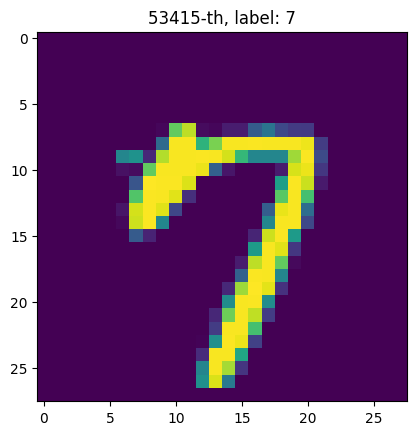

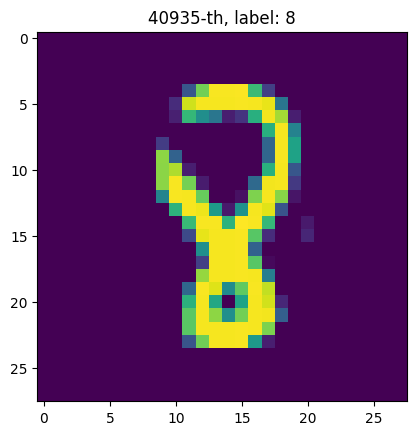

In [ ]:

#random하게 5개 이미지 확인
sample_size = 2
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th, label: %d' %(idx, label))

In [ ]:
# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =1234)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [ ]:
#min_max scaling / flattening
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255

In [ ]:
#Y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# 은닉층1-입력:784, 출력 64를 표시
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
# 은닉층2-입력:32를 표시
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
# 은닉층3-입력:10를 표시
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

# 모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# 학습
history = model.fit(x_train, y_train, epochs = 20,
                    batch_size = 128, validation_data = (x_val,y_val))


Epoch 1/20
329/329 [==============================] - 5s 10ms/step - loss: 0.5259 - acc: 0.8528 - val_loss: 0.2658 - val_acc: 0.9220
Epoch 2/20
329/329 [==============================] - 2s 6ms/step - loss: 0.2199 - acc: 0.9364 - val_loss: 0.2060 - val_acc: 0.9386
Epoch 3/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1720 - acc: 0.9499 - val_loss: 0.1848 - val_acc: 0.9459
Epoch 4/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1409 - acc: 0.9593 - val_loss: 0.1684 - val_acc: 0.9475
Epoch 5/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1198 - acc: 0.9647 - val_loss: 0.1450 - val_acc: 0.9579
Epoch 6/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1011 - acc: 0.9702 - val_loss: 0.1369 - val_acc: 0.9599
Epoch 7/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0895 - acc: 0.9736 - val_loss: 0.1241 - val_acc: 0.9633
Epoch 8/20
329/329 [==============================] - 1s 4ms/step - loss: 0

- 현재 은닉층은 64-32-10 구성인데, 이 부분을 64-32-16-10으로 변경해보세요
- epcohs를 40으로 변경해보세요
- batch_size=256으로 지정해보세요.
-학습과정에서 오버피팅 발생하는 epoch도 찾아보세요

In [ ]:
results = model.predict(x_test)
confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))

313/313 [==============================] - 2s 4ms/step


array([[ 966,    0,    2,    2,    1,    2,    3,    1,    3,    0],
       [   0, 1122,    4,    0,    0,    1,    2,    0,    6,    0],
       [   5,    3, 1001,    4,    1,    0,    4,    4,   10,    0],
       [   1,    1,    7,  974,    0,    5,    0,    8,   11,    3],
       [   2,    0,    5,    0,  953,    1,    5,    3,    0,   13],
       [   2,    1,    0,   10,    1,  869,    8,    1,    0,    0],
       [   5,    4,    2,    1,    6,    4,  932,    1,    3,    0],
       [   1,    8,    7,    8,    2,    0,    0,  988,    1,   13],
       [   3,    1,    3,    6,    6,    8,    2,    6,  936,    3],
       [   4,    1,    1,   13,   10,    8,    1,    6,    7,  958]])

- Confusion Matrix

313/313 [==============================] - 2s 6ms/step


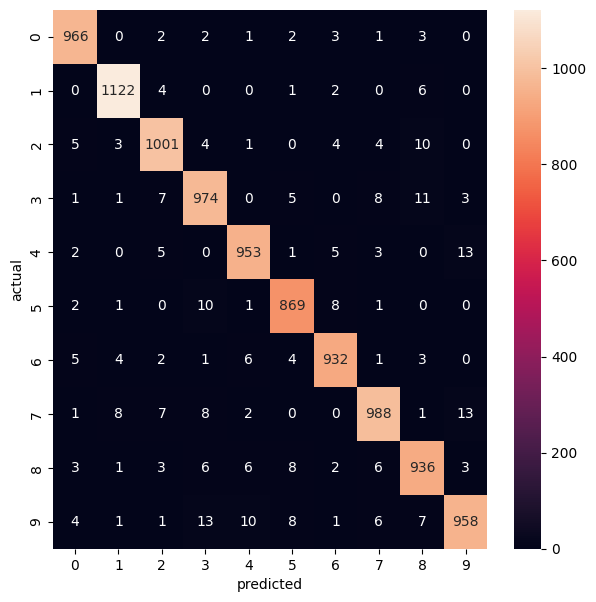


               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
results = model.predict( x_test)
#혼동행렬을 만듬.
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


